In [28]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# install xlrd or openpyxl (newer!)
# !pip install openpyxl

In [29]:
# read excel sheet
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

# remove some columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# and rename others
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# calculate Total for each country (based on numeric columns only)
df_can['Total'] = df_can.select_dtypes(include=['int64','float64']).sum(axis=1)

# make year columns string (instead of integer)
#df_can.columns = list(map(str, df_can.columns))
# even better:
df_can.columns = df_can.columns.astype(str)

# set country as index
df_can.set_index('Country', inplace=True)
df_can.index.name = None

# write to excel, for later reuse
df_can.to_excel('canada_clean.xlsx')



Text(0.5, 0, 'Years')

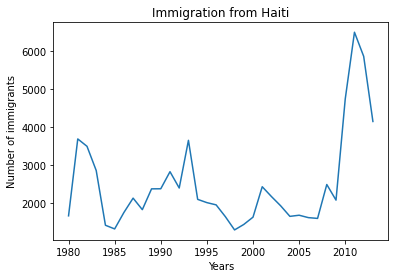

In [23]:
years = list(map(str, range(1980, 2014)))
df_can.loc['Haiti', years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
#plt.show()

In [24]:
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [25]:
# transpose dataframe to make years the observation
df_CI = df_CI.transpose()
df_CI.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


Text(0.5, 0, 'Years')

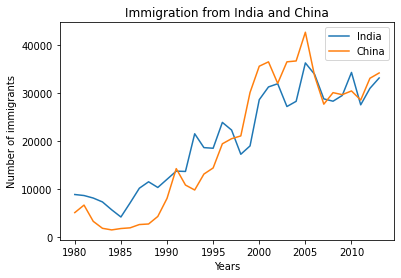

In [26]:
df_CI.plot(kind='line')
plt.title('Immigration from India and China')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

Text(0, 0.5, 'Number of Immigrants')

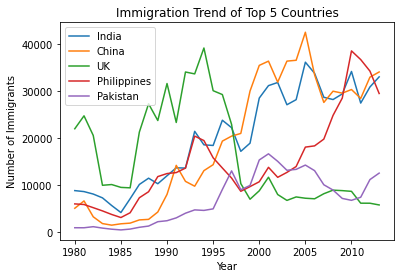

In [27]:
# get top 5 countries (regarding total immigration)
df_top5 = df_can.sort_values(by='Total', ascending=False, axis=0).head()
# make UK index easy to handle
df_top5.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
# get years 1980 - 2013 and transpose df
df_top5 = df_top5[years].transpose()
# plot the trend of top 5 immigration countries
df_top5.plot()
plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')